In [2]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime
import shapely
from test.processors.planetary.sentinel_2_l2a.test_processor import create_test_geobox

import stacathome


geobox = create_test_geobox(shapely.Point(603053,7099667), resolution=100, size_box=5000, crs='EPSG:32735')
roi = geobox.footprint('EPSG:4326', buffer=0, npoints=4)

startdate = datetime(2025, 7, 10)
enddate = datetime(2025, 7, 15)

# login and env setup for cdse
_id, _key  = stacathome.SecretStore().get_key('cdse') 
os.environ["GDAL_HTTP_TCP_KEEPALIVE"] = "YES"
os.environ["AWS_S3_ENDPOINT"] = "eodata.dataspace.copernicus.eu"
os.environ["AWS_ACCESS_KEY_ID"] = f"{_id}"
os.environ["AWS_SECRET_ACCESS_KEY"] = f"{_key}"
os.environ["AWS_HTTPS"] = "YES"
os.environ["AWS_VIRTUAL_HOSTING"] = "FALSE"
os.environ["GDAL_HTTP_UNSAFESSL"] = "YES"

In [ ]:
from stacathome.requests import _get_provider_and_processor

for i in range(2019, 2024):
    for month in [6, 9]:
        startdate = datetime(i, month, 1)
        enddate = datetime(i, month+1, 1)

        provider_name = 'earthaccess'
        collection = 'ECO_L2T_LSTE'
        kwargs = {'version': '002'}


        provider, processor = _get_provider_and_processor(provider_name, collection, None, False)

        items = provider.request_items(
            collection=collection,
            starttime=startdate,
            endtime=enddate,
            roi=roi,
            **kwargs,
        )
        if not items:
            raise ValueError('No items matched the search query')

        items = processor.filter_items(provider, roi, items)

        provider.load_granule(
            items,
            out_dir='/Net/Groups/BGI/work_5/scratch/mzehner/kschindler_data/ECO_LST_Johannesburg',
            threads=4)

In [12]:
len(items)

12

In [13]:
items

In [14]:
path = '/Net/Groups/BGI/work_5/scratch/mzehner/kschindler_data/ECO_LST_Johannesburg'



In [ ]:
provider.load_granule(items)

In [3]:
roi.explore()

In [2]:
collection, dataset = stacathome.load(
    provider_name='earthaccess',
    collection='ECO_L2T_LSTE',
    version ='002',
    roi=roi,
    starttime=startdate,
    endtime=enddate,
    variables=['LST'],
)
dataset

<xarray.Dataset> Size: 168kB
Dimensions:      (y: 144, x: 144, time: 2)
Coordinates:
  * y            (y) float64 1kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x            (x) float64 1kB 5.981e+05 5.981e+05 ... 6.08e+05 6.081e+05
    spatial_ref  int32 4B 32735
  * time         (time) datetime64[ns] 16B 2025-07-10T14:12:24.857000 2025-07...
Data variables:
    LST          (time, y, x) float32 166kB 290.5 290.5 291.2 ... 290.3 290.7

In [2]:
from stacathome.processors import BaseProcessor
collection, dataset = stacathome.load(
    provider_name='cdse',
    collection='sentinel-2-l2a',
    roi=roi,
    starttime=startdate,
    endtime=enddate,
    variables=['B08_10m', 'B8A_20m', 'B01_60m'],
    # processor=BaseProcessor(),
)
dataset

dict_keys(['resampling'])


<xarray.Dataset> Size: 10MB
Dimensions:      (time: 2, y_0: 1001, x_0: 1001, y_1: 501, x_1: 501, y_2: 168,
                  x_2: 168)
Coordinates:
  * y_0          (y_0) float64 8kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x_0          (x_0) float64 8kB 5.981e+05 5.981e+05 ... 6.08e+05 6.081e+05
    spatial_ref  int32 4B 32735
  * time         (time) datetime64[ns] 16B 2025-07-11T07:50:31.024000 2025-07...
  * y_1          (y_1) float64 4kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x_1          (x_1) float64 4kB 5.98e+05 5.981e+05 ... 6.08e+05 6.08e+05
  * y_2          (y_2) float64 1kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x_2          (x_2) float64 1kB 5.98e+05 5.981e+05 ... 6.08e+05 6.081e+05
Data variables:
    B08_10m      (time, y_0, x_0) float32 8MB 3.564e+03 2.436e+03 ... 1.696e+03
    B8A_20m      (time, y_1, x_1) float32 2MB 3.223e+03 2.41e+03 ... 1.588e+03
    B01_60m      (time, y_2, x_2) float32 226kB 565.0 655.0 ... 196.0 211.0

In [4]:
collection

In [5]:
collection_pc, dataset_pc = stacathome.load(
    provider_name='planetary_computer',
    collection='sentinel-2-l2a',
    roi=roi,
    starttime=startdate,
    endtime=enddate,
    variables=['B08', 'B8A', 'B01'],
)
dataset_pc

dict_keys(['longname', 'description', 'unit', 'roles', 'nodata_value', 'offset', 'scale', 'spatial_resolution', 'center_wavelength', 'full_width_half_max', 'resampling'])


<xarray.Dataset> Size: 5MB
Dimensions:      (time: 2, y_0: 1001, x_0: 1001, y_1: 501, x_1: 501, y_2: 168,
                  x_2: 168)
Coordinates:
  * y_0          (y_0) float64 8kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x_0          (x_0) float64 8kB 5.981e+05 5.981e+05 ... 6.08e+05 6.081e+05
    spatial_ref  int32 4B 32735
  * time         (time) datetime64[ns] 16B 2025-07-11T07:50:31.024000 2025-07...
  * y_1          (y_1) float64 4kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x_1          (x_1) float64 4kB 5.98e+05 5.981e+05 ... 6.08e+05 6.08e+05
  * y_2          (y_2) float64 1kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x_2          (x_2) float64 1kB 5.98e+05 5.981e+05 ... 6.08e+05 6.081e+05
Data variables:
    B08          (time, y_0, x_0) uint16 4MB 3564 2436 1748 ... 1864 1460 1696
    B8A          (time, y_1, x_1) uint16 1MB 3223 2410 1624 ... 1885 1605 1588
    B01          (time, y_2, x_2) uint16 113kB 565 655 656 604 ... 250 196 211

In [14]:
collection_pc

In [39]:
import numpy as np


np.unique((dataset.B01_60m.isel(time=2) - 1000 ).values == dataset_pc.B01.isel(time=0).values)

array([ True])

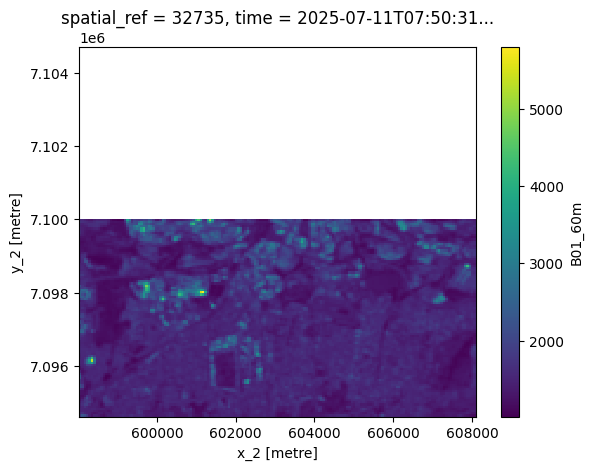

In [42]:
dataset.B01_60m.isel(time=3).plot()

In [6]:
# startdate = datetime(2024, 7, 10)
# enddate = datetime(2024, 7, 30)

# collection, dataset = stacathome.load(
#     provider_name='earthaccess',
#     collection='ECO_L2T_LSTE',
#     version ='002',
#     roi=roi,
#     starttime=startdate,
#     endtime=enddate,
#     variables=['LST'],
# )
# dataset

import shapely
from stacathome.providers import get_provider
from stacathome.processors.ecostress import ECO_L2T_LSTEProcessor
from stacathome.stac import enclosing_geoboxes_per_grid
from test.processors.planetary.sentinel_2_l2a.test_processor import create_test_geobox

variables = ['LST']
provider = get_provider('earthaccess')

geobox = create_test_geobox(shapely.Point(603053,7099667), resolution=100, size_box=5000, crs='EPSG:32735')
roi = geobox.footprint('EPSG:4326', buffer=0, npoints=4)

items = provider.request_items(
    collection='ECO_L2T_LSTE',
    version ='002',
    starttime='2025-07-10',
    endtime='2025-07-15',
    roi=roi,
)

processor = ECO_L2T_LSTEProcessor()

u_items = processor.filter_items(provider, roi, items)

# #-< enter solution 2 get all granules - the next line will download all selected variables in the filtered u_items
u_items = provider.load_granule(u_items, variables)

# # now the items assets are updated (just for the selected variables!) so creating a zarr from them local:

gb = enclosing_geoboxes_per_grid(u_items[0], roi)
data = processor.load_items_geoboxed(provider, gb[0].enclosing_box, u_items, variables = variables)
# data.to_zarr('/Net/Groups/BGI/work_5/scratch/mzehner/eco_MLESM/ecostress_test.zarr', mode='w')

In [7]:
data

<xarray.Dataset> Size: 168kB
Dimensions:      (y: 144, x: 144, time: 2)
Coordinates:
  * y            (y) float64 1kB 7.105e+06 7.105e+06 ... 7.095e+06 7.095e+06
  * x            (x) float64 1kB 5.981e+05 5.981e+05 ... 6.08e+05 6.081e+05
    spatial_ref  int32 4B 32735
  * time         (time) datetime64[ns] 16B 2025-07-10T14:12:24.857000 2025-07...
Data variables:
    LST          (time, y, x) float32 166kB 290.5 290.5 291.2 ... 290.3 290.7